# TME IAR: Robotique Évolutionniste

* Étudiant 1: Nom: QIU Prénom: QI
* Étudiant 2: Nom: KLEINPETER Prénom: FELIX

Dans ce TME vous allez utiliser le code développé lors de la séance précédente pour étudier les différentes questions qui peuvent se soulever lorsque l'on réalise un apprentissage de politique.

Vous pourrez, au choix, mettre votre code dans des cellules du notebook, ou bien les mettre dans un script python.

Vous devrez envoyer à stephane.doncieux@sorbonne-universite.fr vos fichiers (notebook avec figures générées et scripts python et autres fichiers indispensables pour reproduire vos résultats. **ATTENTION** merci de mettre comme sujet: \[TME IAR\] nom1 et nom2, au risque que votre mail soit perdu dans les limbes...

Les algorithmes évolutionnistes sont des algorithmes stochastiques. Cela signifie que deux expériences avec le même code et les mêmes paramètres peuvent avoir des résultats différents. En conséquence, il ne faut pas tirer de conclusions sur la base d'une seule expérience car la variabilité dans les résultats peut être importante. Étant en temps limité sur des machines de puissance moyenne, il ne vous est pas demandé de réaliser les dizaines d'expériences qui seraient normalement nécessaires. Vous essayerez par contre, dans la mesure du possible, de vérifier que vos résultats sont cohérents sur 2 ou 3 expériences. 

In [48]:
# Note: l'import d'un fichier ne se fait qu'une seule fois. Si vous modifiez ce fichier, 
# il vous faut redémarrer votre kernel si vous voulez prendre en compte les modifications.
# vous pouvez éviter cela de la façon suivante: 
import importlib # une seule fois
import plot # le module doit avoir été importé une première fois
importlib.reload(plot) # cette ligne permet de charger la dernière version
import numpy
import matplotlib.pyplot as plt
import pickle

def plo(position_record,nameimg):
    heatmap =  numpy.full((60,60), 100)
    for position in position_record:
        x = int(position[0]) // 10
        y = int(position[1]) // 10
        heatmap[y][x] -= 1
    plt.imshow(heatmap)
    plt.savefig(nameimg)
    plt.show()

def stock(data,path):
    # open a file, where you ant to store the data
    file = open(path, 'wb')     # le 07 nov  X:Y
    # dump information to that file
    pickle.dump(data, file)
    # close the file
    file.close()
# pour que les figures apparaissent directement dans le notebook
%matplotlib inline 

## Algorithmes Évolutionnistes multi-objectifs

**1-** À l'aide du framework DEAP, implémentez NSGA-II et testez le avec des fonctions benchmarks (par exemple `schaffer_mo`). ** Vous complèterez le fichier `nsga-2.py` **. Vous tracerez un front de pareto obtenu par une de vos expériences.

/users/Etu5/3308135/.local/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/users/Etu5/3308135/.local/lib/python3.7/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Strategy' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


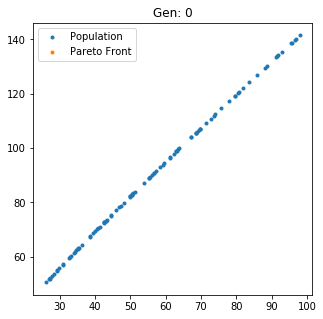

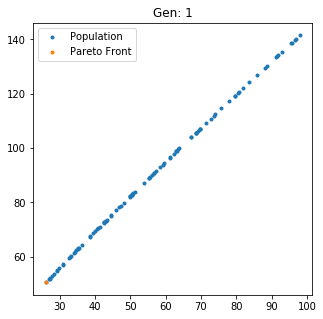

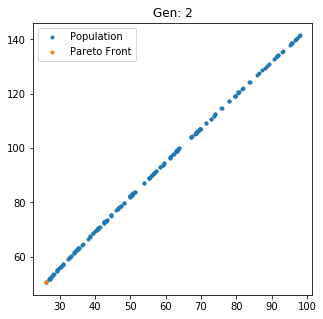

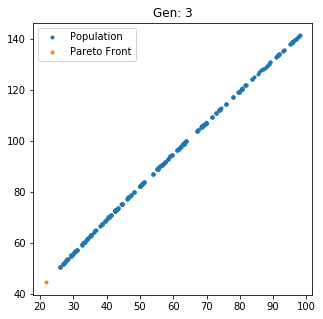

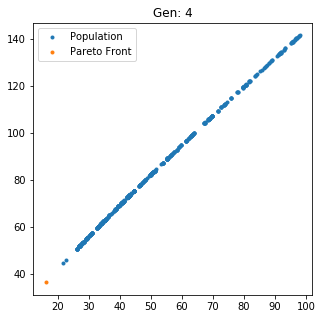

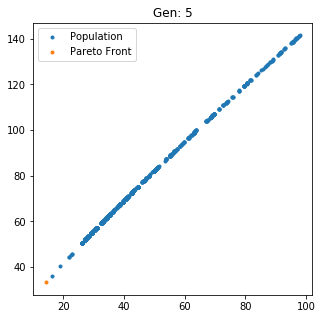

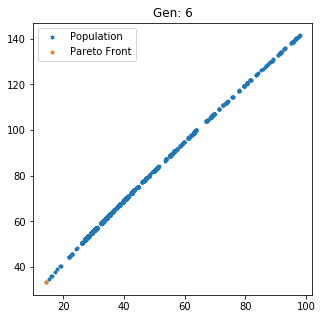

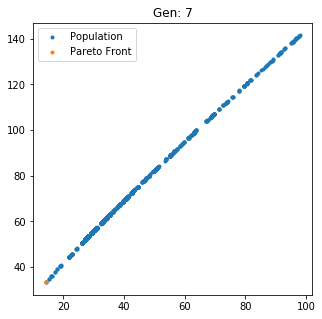

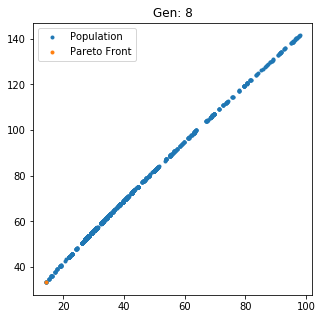

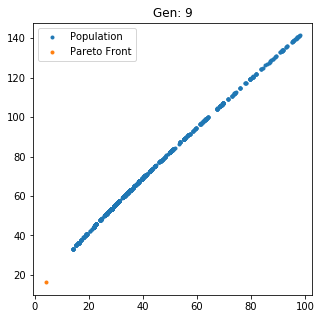

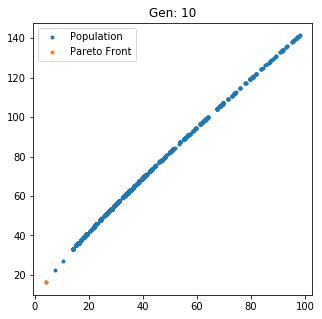

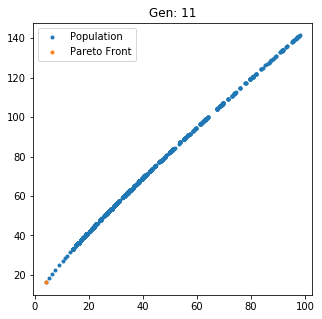

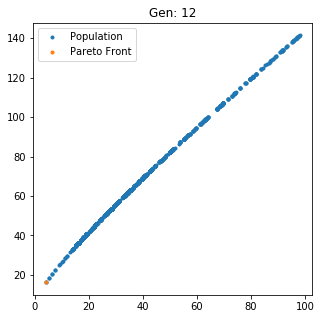

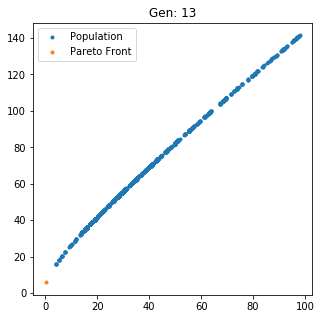

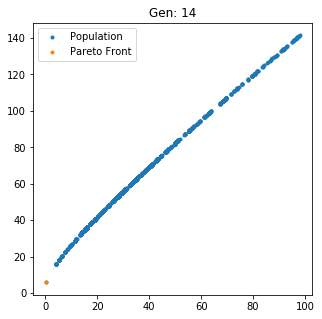

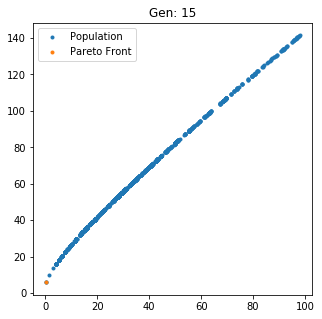

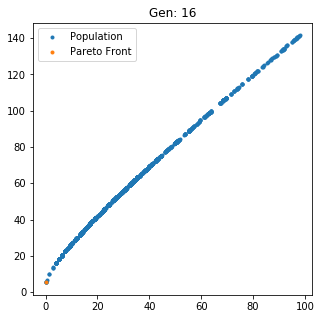

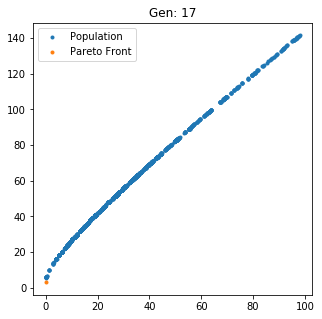

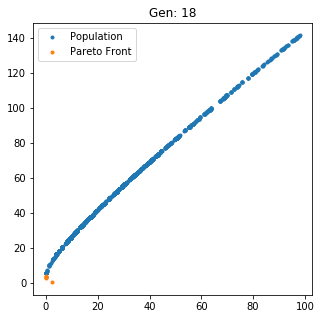

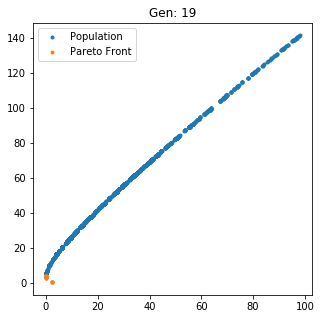

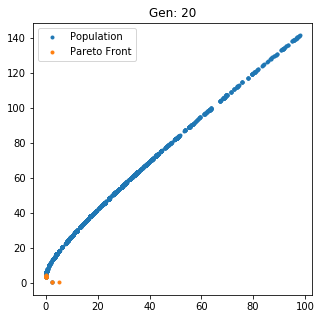

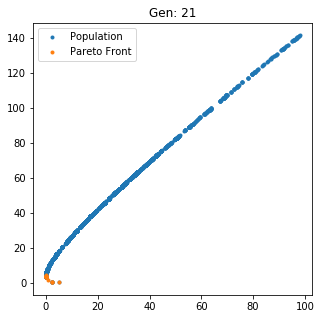

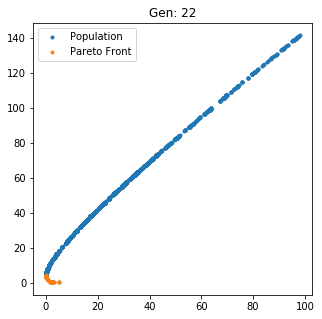

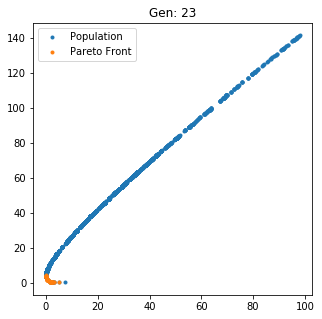

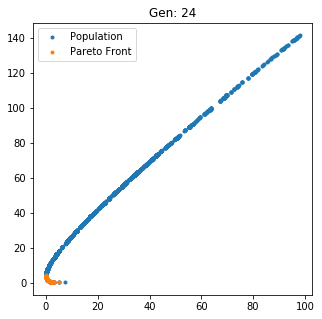

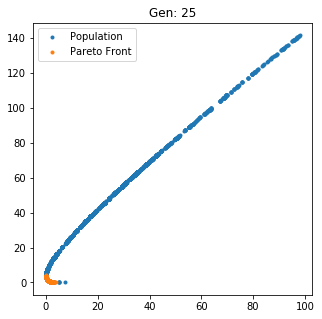

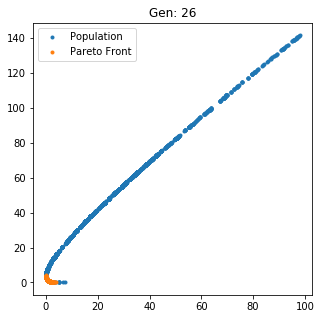

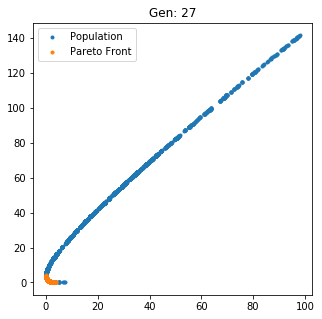

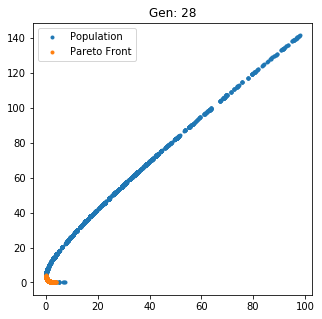

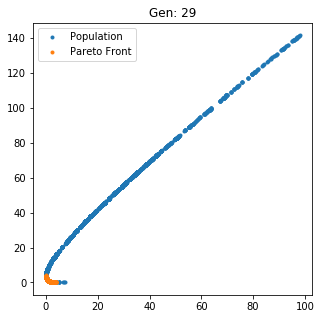

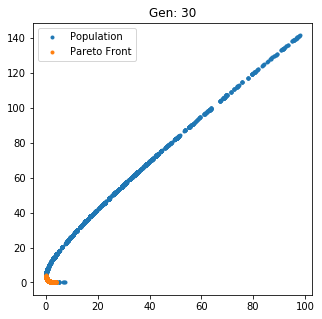

In [49]:
# complétez pour inclure le code (que vous pouvez aussi mettre dans un fichier python) et, surtout, les résultats obtenus
import nsga_2
from deap import benchmarks
importlib.reload(nsga_2)
ngen=30
population,logbook,paretofront = nsga_2.launch_nsga2(ngen=ngen,mu=100,lambda_=200,cxpb=0.6,mutpb=0.3,display=True)

Les individus de la population s'approchent graduaduellement de les solutions pareto-non dominees.

**2-** Reprenez l'expérience du pendule inversé et définissez deux objectifs: l'un étant la somme des valeurs absolue des écarts à la valeur centrale en x, l'autre étant la même chose, mais pour l'angle d'écart à la verticale. Tracez l'évolution de x et de theta pour plusieurs points de départ. Si le pendule n'est pas stabilisé au centre et verticalement, analysez votre fonction de fitness et votre processus d'évaluation et modifiez-les pour corriger le problème. **Vous partirez du code du TME précédent sur le cartpole que vous mettrez dans un fichier `gym_cartpole_2.py`** 

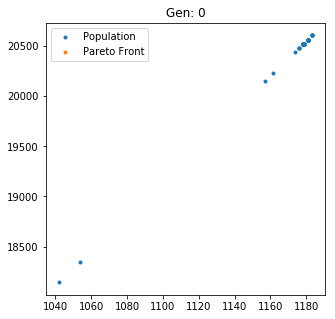

generation  1


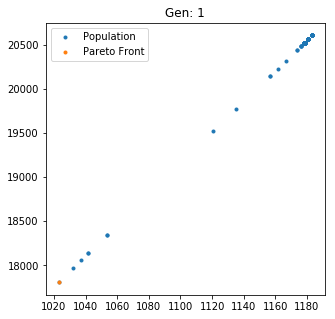

generation  2


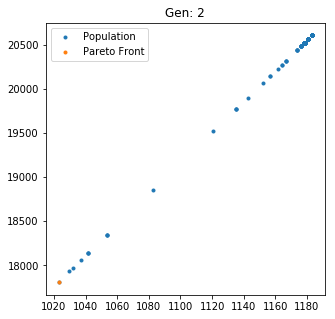

generation  3


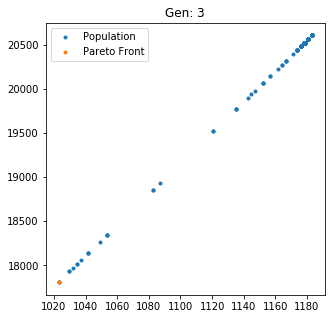

generation  4


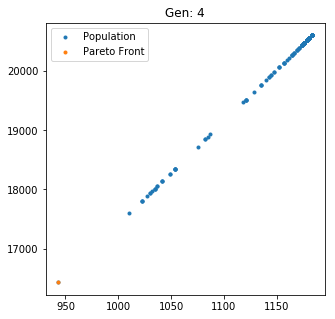

generation  5


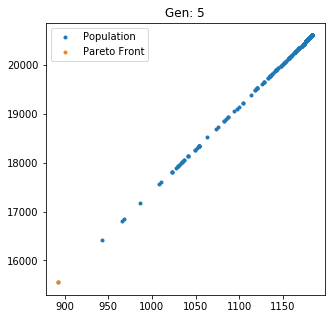

generation  6


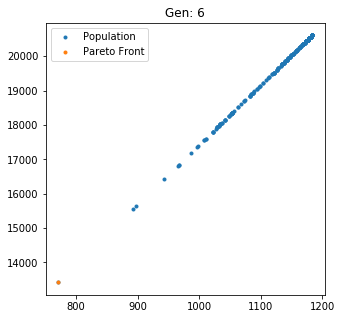

generation  7


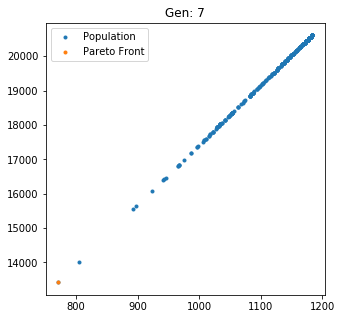

generation  8


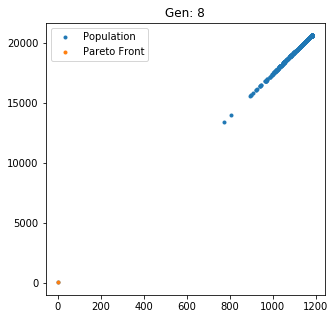

generation  9


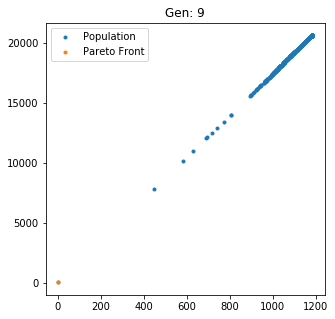

generation  10


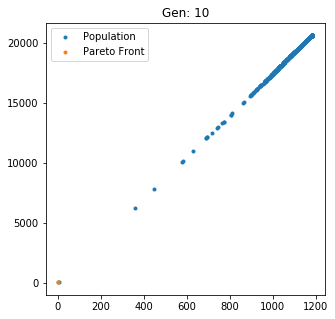

generation  11


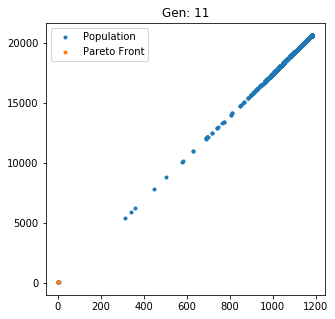

generation  12


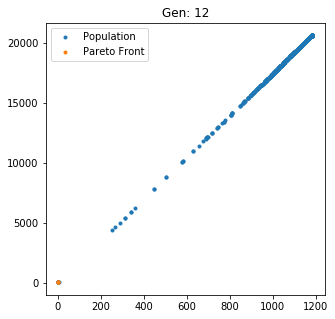

generation  13


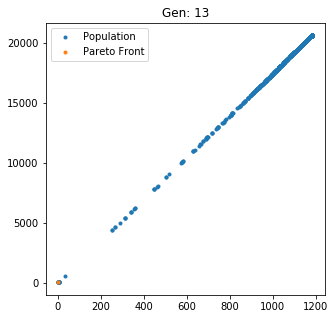

generation  14


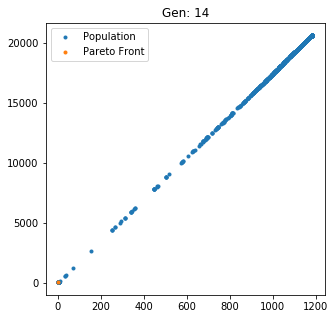

generation  15


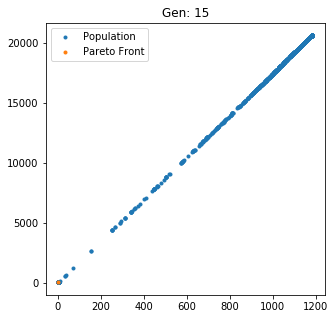

generation  16


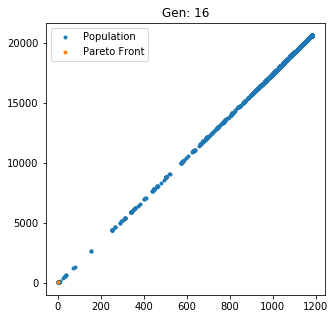

generation  17


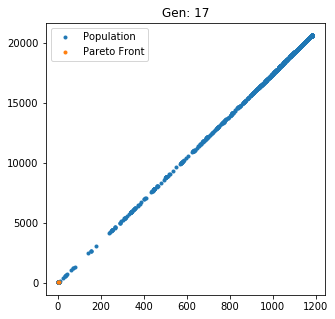

generation  18


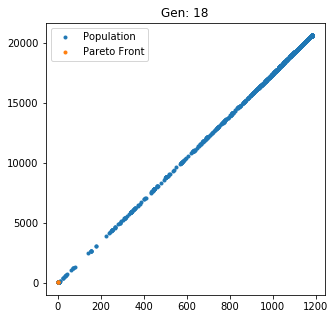

generation  19


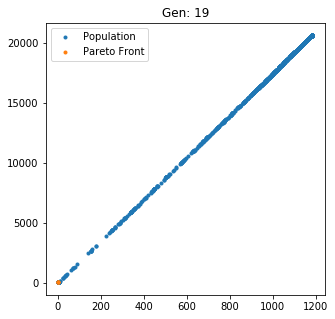

generation  20


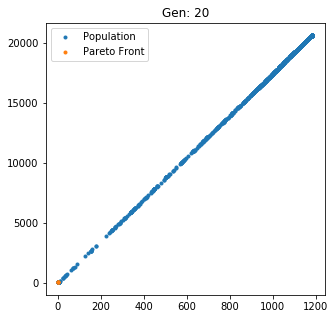

generation  21


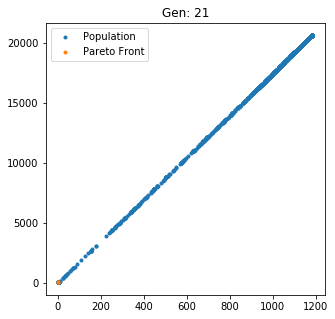

generation  22


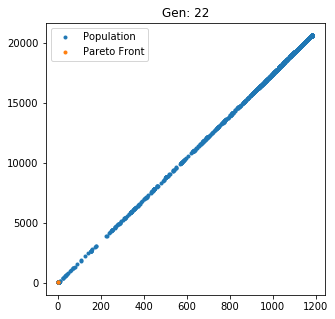

generation  23


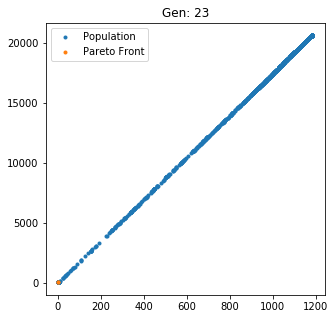

generation  24


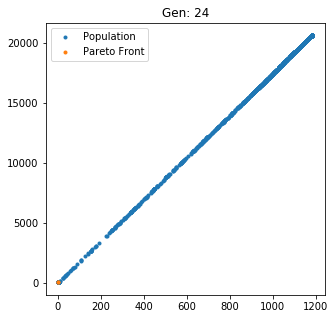

generation  25


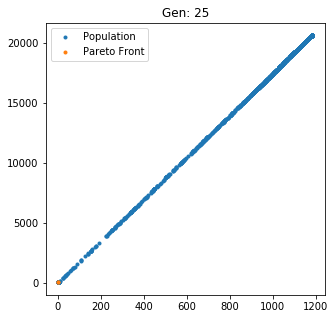

generation  26


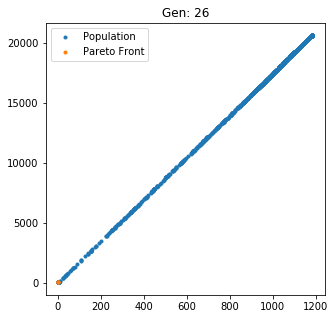

generation  27


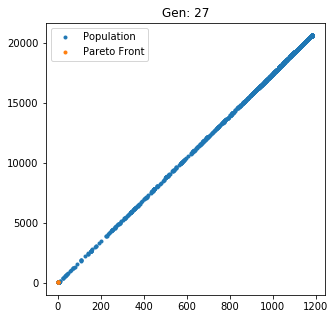

generation  28


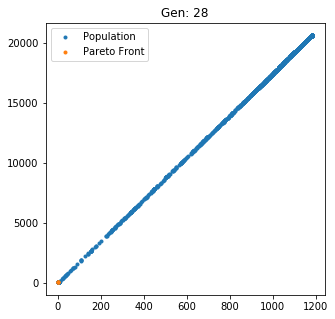

generation  29


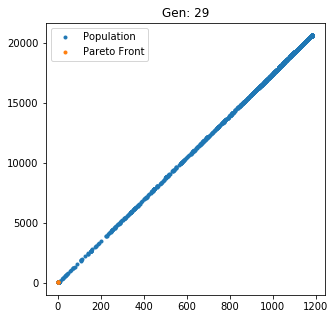

generation  30


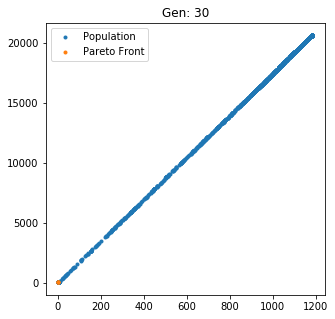

generation  31


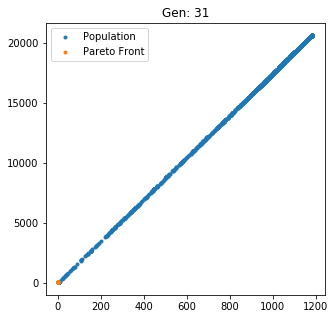

generation  32


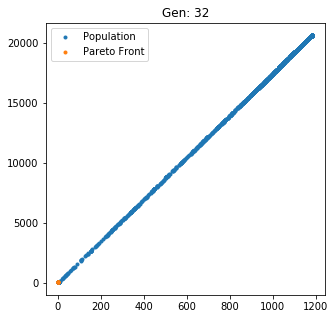

generation  33


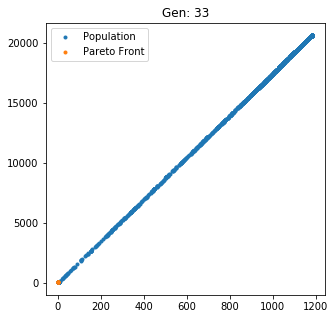

generation  34


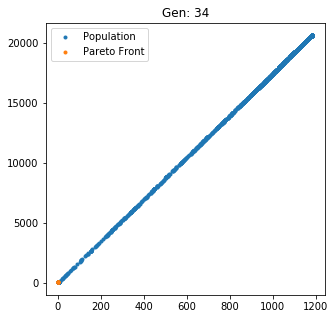

generation  35


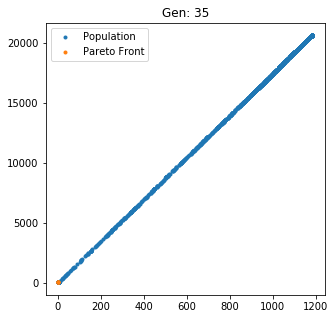

generation  36


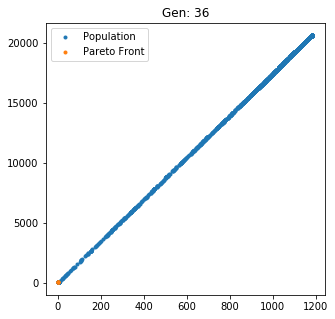

generation  37


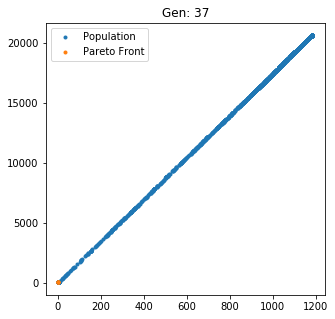

generation  38


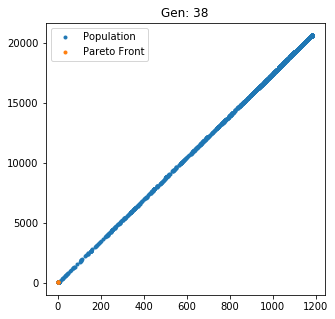

generation  39


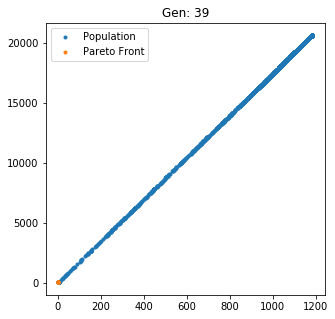

generation  40


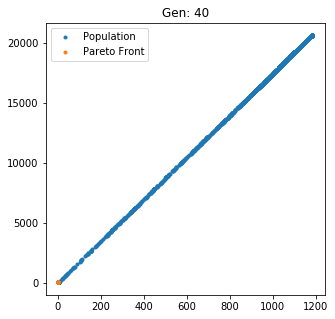

generation  41


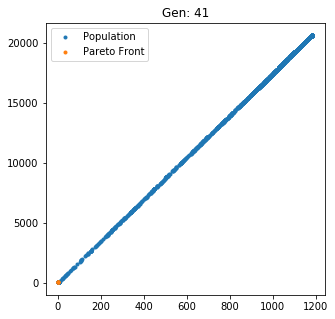

generation  42


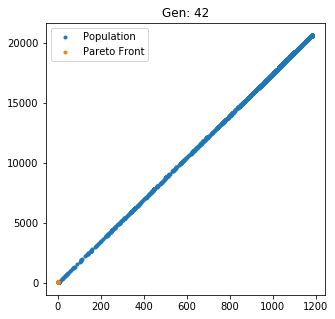

generation  43


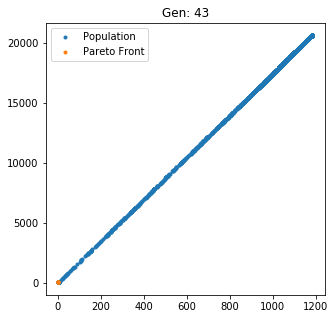

generation  44


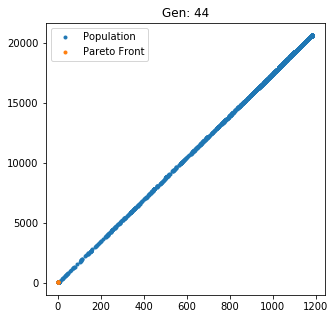

generation  45


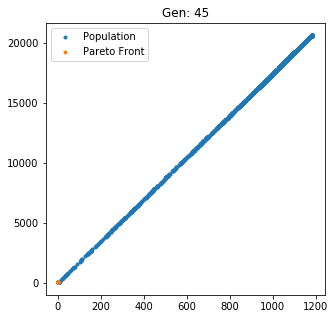

generation  46


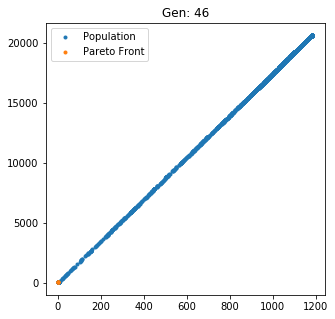

generation  47


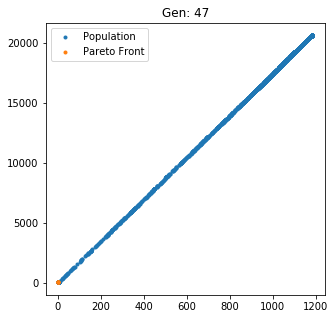

generation  48


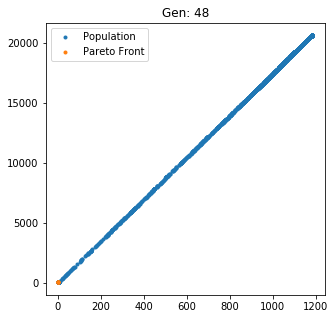

generation  49


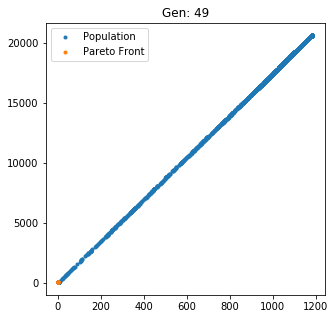

generation  50


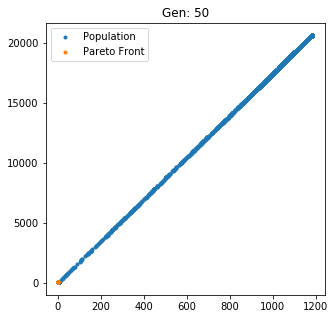

In [52]:
import gym_cartpole_2
import gym
from deap import tools
importlib.reload(gym_cartpole_2)
# gym init
env = gym.make('CartPole-v1')
popfinal, logbook, pareto = gym_cartpole_2.es(env,nb_generation = 50,size_pop=50,lambda_=100,display=True)
env.close()

Avec les deux objectifs donnés dans l'énoncé, les agents ne sont pas stabilisé au centre et verticalement, car un agent qui rate le jeu dès le début pourrait obtenir un score élevé. Ainsi, nous avons ajouter une pénalité de plus pour pénaliser les agents qui finissent tôt. Avec les nouveaux objectifs, les agents apprennent graduellement à jouer ce jeu.

## Fitness & Nouveauté

L'environnement `FastsimSimpleNavigation-v0` de gym_fastsim permet de lancer des expériences de navigation avec un robot à roues naviguant dans un labyrinthe. Vous allez dans cette partie reproduire les expériences de Lehman et Stanley sur la recherche de nouveauté. Pour installer gym_fastsim, vous aurez tout d'abord besoin d'installer pyfastsim grâce au script utilisé pendant un TME précédent (https://github.com/benoit-girard/TME-NavigationStrategies.git). Vous devrez ensuite installer gym (pip3 install --user gym) et gym_fastsim (https://github.com/alexendy/fastsim_gym.git: git clone et pip3 install . dans le répertoire fastsim_gym).

**1-**  Lancer une première expérience dans laquelle le robot doit atteindre la sortie du labyrinthe. Vous pourrez essayer avec la reward de l'expérience, qui est 

une reward binaire (sortie atteinte ou non) et avec 

une fitness plus continue dans laquelle la récompense est la distance à la sortie 

(à minimiser donc). Pour observer le comportement de la recherche effectuée, vous pourrez écrire les positions du robot et ensuite tracer ces positions avec la fonction `plot_traj_file`. Remarque: il y a 2000 positions par évaluation. Pour limiter la taille du fichier, vous pourrez n'écrire qu'une position sur 100, par exemple. Vous pourrez aussi utiliser cette fonction pour tracer des trajectoires individuelles. 

Tracez ci-dessous au moins 3 exemples de positions explorées par 3 expériences différentes.

Quelles parties de l'espace ont été explorées dans les deux cas ? Est-ce que la sortie est atteinte (vous vous limiterez à 200 générations) ? Si oui, au bout de combien de générations ? ** Vous complèterez le code fourni dans `gym_fastsim.py` (variante "Fit")**.

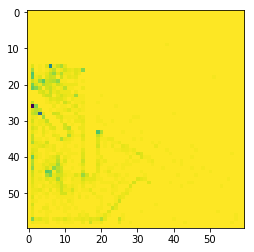

In [53]:
# Experience 1
import os
import maze_plot
import plot
import gym_fastsim_3, gym
importlib.reload(gym_fastsim_3)

importlib.reload(gym_fastsim_3)
env = gym.make('FastsimSimpleNavigation-v0')
nb_generation = 50 
size_pop = 50
pb_crossover = 0.6
pb_mutation = 0.5
_,_,_,position_record,but_atteint,but_gen,means,mins = gym_fastsim_3.launch_nsga2(env,"FIT",pb_mutation=pb_mutation,pb_crossover=pb_crossover,nb_generation=nb_generation, size_pop=size_pop)
env.close()
path = "log/FIT_1_position_record_09_nov_14_25"
plo(position_record,path)
stock(position_record,path)


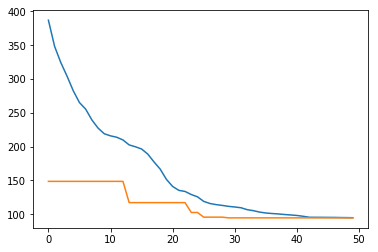

In [54]:
plt.plot(means)
plt.plot(mins)
plt.show()

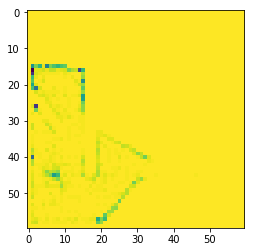

In [55]:
# Experience 2
importlib.reload(gym_fastsim_3)
env = gym.make('FastsimSimpleNavigation-v0')
nb_generation = 50 
size_pop = 50
pb_crossover = 0.6
pb_mutation = 0.5
_,_,_,position_record,but_atteint,but_gen,means2,mins2 = gym_fastsim_3.launch_nsga2(env,"FIT",pb_mutation=pb_mutation,pb_crossover=pb_crossover,nb_generation=nb_generation, size_pop=size_pop)
env.close()
path = "log/FIT_2_position_record_09_nov_14_25"
plo(position_record,path)
stock(position_record,path)

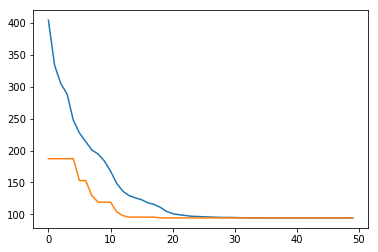

In [56]:
plt.plot(means2)
plt.plot(mins2)
plt.show()

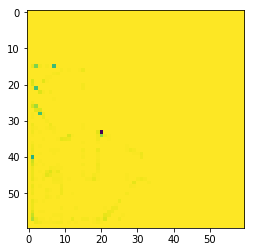

In [57]:
# Experience 3
importlib.reload(gym_fastsim_3)
env = gym.make('FastsimSimpleNavigation-v0')
nb_generation = 50 
size_pop = 50
pb_crossover = 0.6
pb_mutation = 0.5
_,_,_,position_record,but_atteint,but_gen,means3,mins3 = gym_fastsim_3.launch_nsga2(env,"FIT",pb_mutation=pb_mutation,pb_crossover=pb_crossover,nb_generation=nb_generation, size_pop=size_pop)
env.close()
path = "log/FIT_3_position_record_09_nov_14_25"
plo(position_record,path)
stock(position_record,path)

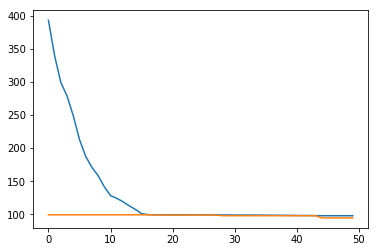

In [58]:
plt.plot(means3)
plt.plot(mins3)
plt.show()

### Commentaires pour FIT seulement 

On observe qu'en utilisant le fit comme seul objectif, les agents se trouvent vite bloqués dans le premier coin en cherchant uniquement à se diriger vers l'objectif. C'est très visible sur le deuxième graphe. Il faut ajouter un paramètre pour favoriser l'exploration.
On observe également sur les courbes, représentant en bleu la moyenne des offsprings et en orange le minimum, une convergence vers une valeure minimale à 100 caractéristique d'une situation d'entêtement vers un coin pour se rapprocher de l'objectif.

**2-** Implémentez la même expérience, mais en utilisant le critère de nouveauté à la place de la fitness. Vous utiliserez pour cela le code fourni dans `novelty_search.py`. 

La recherche de nouveauté s'appuie sur des descripteurs comportementaux et cherche à maximiser la distance aux plus proches voisins parmi la population et une archive des individus rencontrés. Le calcul du critère de nouveauté doit donc être réalisé après l'évaluation de tous les individus. 

Implémentez la recherche de nouveauté, observez les positions explorées et comparez les aux expériences précédentes. Est-ce que la sortie est atteinte ? Si oui, au bout de combien de générations ? ** Vous complèterez le code fourni dans `gym_fastsim.py` (variante "NS")**.

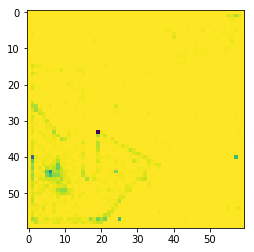

In [63]:
# experience 1
importlib.reload(gym_fastsim_3)
env = gym.make('FastsimSimpleNavigation-v0')
nb_generation = 50 
size_pop = 50
pb_crossover = 0.6
pb_mutation = 0.5
_,_,_,position_record,but_atteint,but_gen,means4,mins4 = gym_fastsim_3.launch_nsga2(env,"NS",pb_mutation=pb_mutation,pb_crossover=pb_crossover,nb_generation=nb_generation, size_pop=size_pop)
env.close()
path = "log/NS_1_position_record_09_nov_14_25"
plo(position_record,path)
stock(position_record,path)

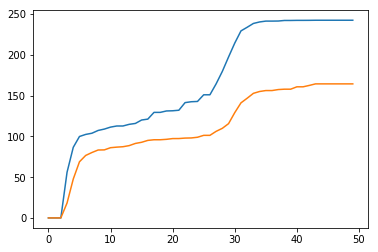

In [64]:
plt.plot(means4)
plt.plot(mins4)
plt.show()

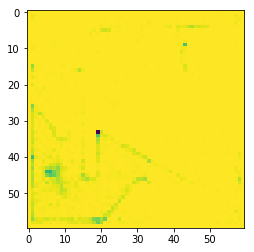

In [65]:
# experience 2
importlib.reload(gym_fastsim_3)
env = gym.make('FastsimSimpleNavigation-v0')
nb_generation = 50 
size_pop = 50
pb_crossover = 0.6
pb_mutation = 0.5
_,_,_,position_record,but_atteint,but_gen,means5,mins5 = gym_fastsim_3.launch_nsga2(env,"NS",pb_mutation=pb_mutation,pb_crossover=pb_crossover,nb_generation=nb_generation, size_pop=size_pop)
env.close()
path = "log/NS_2_position_record_09_nov_14_25"
plo(position_record,path)
stock(position_record,path)

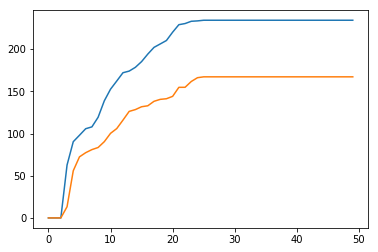

In [66]:
plt.plot(means5)
plt.plot(mins5)
plt.show()

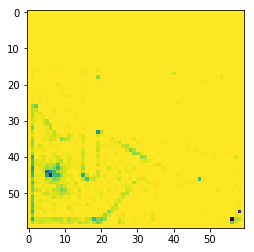

In [67]:
# experience 3
importlib.reload(gym_fastsim_3)
env = gym.make('FastsimSimpleNavigation-v0')
nb_generation = 50 
size_pop = 50
pb_crossover = 0.6
pb_mutation = 0.5
_,_,_,position_record,but_atteint,but_gen,means6,mins6 = gym_fastsim_3.launch_nsga2(env,"NS",pb_mutation=pb_mutation,pb_crossover=pb_crossover,nb_generation=nb_generation, size_pop=size_pop)
env.close()
path = "log/NS_3_position_record_09_nov_14_25"
plo(position_record,path)
stock(position_record,path)

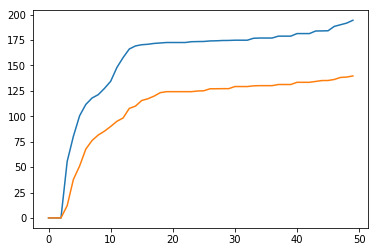

In [68]:
plt.plot(means6)
plt.plot(mins6)
plt.show()

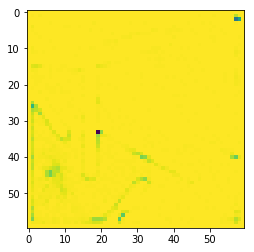

In [69]:
# experience 4
importlib.reload(gym_fastsim_3)
env = gym.make('FastsimSimpleNavigation-v0')
nb_generation = 100 
size_pop = 50
pb_crossover = 0.6
pb_mutation = 0.5
_,_,_,position_record,but_atteint,but_gen,means7,mins7 = gym_fastsim_3.launch_nsga2(env,"NS",pb_mutation=pb_mutation,pb_crossover=pb_crossover,nb_generation=nb_generation, size_pop=size_pop)
env.close()
path = "log/NS_4_position_record_09_nov_14_25"
plo(position_record,path)
stock(position_record,path)

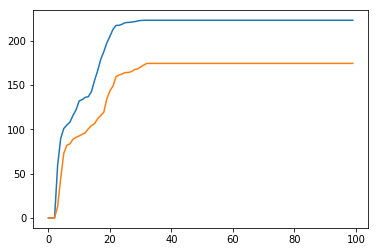

In [70]:
plt.plot(means7)
plt.plot(mins7)
plt.show()

### Conclusions NS

On observe que les agents explorent beaucoup plus uniformement le terrain et ne se fait pas coincer par les murs. Certains arrivent très loin dans le labyrinthe mais il manque quelque chose pour les diriger vers l'objectif. Les courbes représentent en bleu la nouveauté moyenne des offsprings et en orange la minimale. Elle croît jusqu'à stagner dans la plupart des situations. La stagnation se retrouve même en augmentant le nombre d'itérations.

**3-** Faites des expériences avec, à la fois la fitness et le critère de nouveauté. Quelles sont les positions explorées ? Est-ce que la sortie est atteinte ? Si oui, au bout de combien de générations ? ** Vous complèterez le code fourni dans `gym_fastsim.py` (variante "Fit+NS")**.

In [40]:
import os
import maze_plot
import plot
import gym_fastsim_3, gym
importlib.reload(gym_fastsim_3)

<module 'gym_fastsim_3' from '/users/nfs/Etu5/3308135/Bureau/IAR/TME_RE-master/gym_fastsim_3.py'>

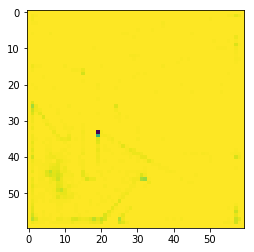

In [44]:

# experience 1
importlib.reload(gym_fastsim_3)
env = gym.make('FastsimSimpleNavigation-v0')
nb_generation = 100 
size_pop = 50
pb_crossover = 0.6
pb_mutation = 0.5
# 70, 50, 0.5, 0.3, sigma = 1
# 70, 50, 0.5, 0.7, sigma = 0.5
_,_,_,position_record,but_atteint,but_gen,means,mins = gym_fastsim_3.launch_nsga2(env,"FIT+NS",pb_mutation=pb_mutation,pb_crossover=pb_crossover,nb_generation=nb_generation, size_pop=size_pop)
env.close()
path = "log/FITNS_1_position_record_09_nov_03_00"
plo(position_record,path)
stock(position_record,path)


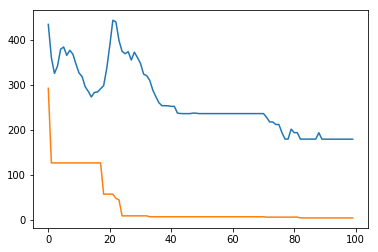

In [45]:
plt.plot(means)
plt.plot(mins)
plt.show()

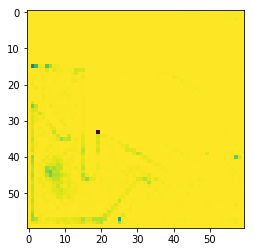

In [46]:
# experience 2
importlib.reload(gym_fastsim_3)
env = gym.make('FastsimSimpleNavigation-v0')
nb_generation = 100 
size_pop = 50
pb_crossover = 0.6
pb_mutation = 0.5
# 70, 50, 0.5, 0.3, sigma = 1
# 70, 50, 0.5, 0.7, sigma = 0.5
_,_,_,position_record,but_atteint,but_gen,means,mins = gym_fastsim_3.launch_nsga2(env,"FIT+NS",pb_mutation=pb_mutation,pb_crossover=pb_crossover,nb_generation=nb_generation, size_pop=size_pop)
env.close()
path = "log/FITNS_2_position_record_09_nov_03_00"
plo(position_record,path)
stock(position_record,path)


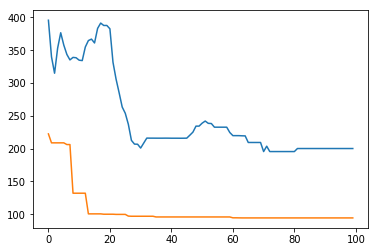

In [47]:
plt.plot(means)
plt.plot(mins)
plt.show()

generation  1
411.94181022514016
206.91662033106752
generation  2
358.8752684186377
206.91662033106752
generation  3
319.6251363916478
206.91662033106752
generation  4
316.012641563172
191.77615778458235
generation  5
315.1632296070093
118.42211861810522
generation  6
319.02451812750553
118.42211861810522
generation  7
320.08093278858524
118.42211861810522
generation  8
321.25273933767244
118.42211861810522
generation  9
325.45594653945295
118.42211861810522
generation  10
312.7149672751585
118.42211861810522
generation  11
311.0475508245282
118.42211861810522
generation  12
288.96257549495493
117.61467400572883
generation  13
263.7613205056391
117.61467400572883
generation  14
246.86920085519318
100.32428332253758
generation  15
242.18914345884022
100.32428332253758
generation  16
209.76237019486211
100.32428332253758
generation  17
185.3359150635941
100.32428332253758
generation  18
167.0482052307014
100.30066711764594
generation  19
156.43238759995512
100.30066711764594
generation  

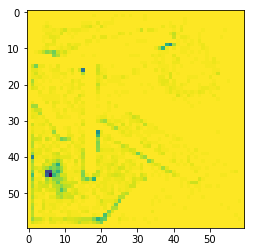

La sortie n'est pas atteinte.


In [38]:
#experience 3
importlib.reload(gym_fastsim_3)
env = gym.make('FastsimSimpleNavigation-v0')
nb_generation = 100 
size_pop = 50
pb_crossover = 0.6
pb_mutation = 0.5
# 70, 50, 0.5, 0.3, sigma = 1
# 70, 50, 0.5, 0.7, sigma = 0.5
_,_,_,position_record,but_atteint,but_gen,means,mins = gym_fastsim_3.launch_nsga2(env,"FIT+NS",pb_mutation=pb_mutation,pb_crossover=pb_crossover,nb_generation=nb_generation, size_pop=size_pop)
env.close()
path = "log/FITNS_3_position_record_09_nov_03_00"
plo(position_record,path)
stock(position_record,path)



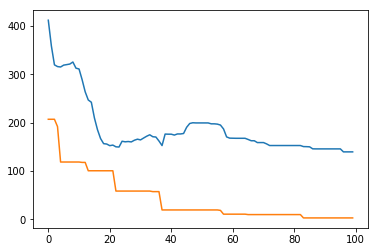

In [39]:
plt.plot(means)
plt.plot(mins)
plt.show()

### Conclusions FIT + NS

Ici, on peut observer que dans certaines situations, le minimum des fitnesses (courbe en orange, distance finale à l'objectif) des offsprings tends vers 0, ce qui signifie que certains agents arrivent à la sortie. Les moyennes des fitnesses (courbes en bleu) oscillent généralement avant de décroître. Dans certains cas, l'aspect aléatoire de l'algorithme ne permet pas la convergence, c'est par exemple le cas du deuxième essai.

Si vous avez fini en avance, profitez du temps restant pour lancer d'autres instances de vos expériences et générer des résultats plus solides.

## Optionnel

Faites le même genre d'expériences avec d'autres environnement de gym, par exemple le BipedalWalker.